In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(300, 2)


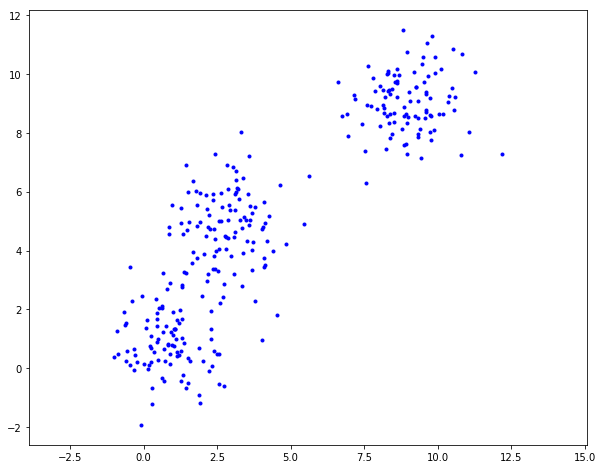

In [2]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.axis('equal')
plt.show()

[[ 3.39734933  3.9168881 ]
 [ 1.35771542 -0.21987021]
 [ 1.06555289  1.34662655]]


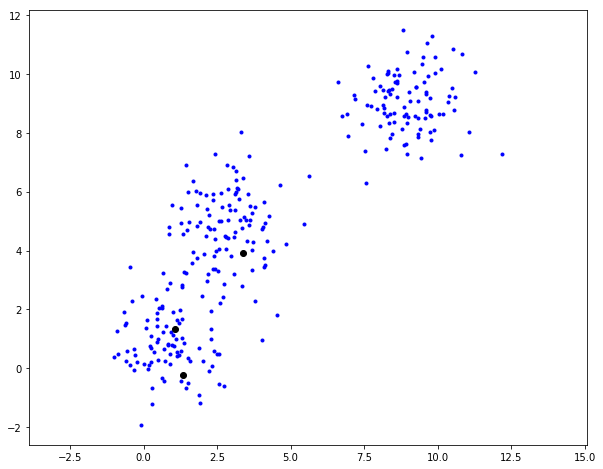

In [3]:
# The number of clusters and data
k = 3
m = X.shape[0]

# ramdomly initialize mean points
mu = X[np.random.randint(0, m, k), :]
pre_mu = mu.copy()
print(mu)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.plot(mu[:,0], mu[:,1], 'ko')
plt.axis('equal')
plt.show()

In [4]:
# sklearn 사용하지 않고 코딩
y = np.empty([m,1])

for n_iter in range(500):
    for i in range(m):
        d0 = np.linalg.norm(X[i,:]-mu[0,:], 2)
        d1 = np.linalg.norm(X[i,:]-mu[1,:], 2)
        d2 = np.linalg.norm(X[i,:]-mu[2,:], 2)
        
        y[i] = np.argmin([d0,d1,d2])
        
    err = 0
    for i in range(k):
        mu[i,:] = np.mean(X[np.where(y==i)[0]], axis=0)
        err += np.linalg.norm(pre_mu[i,:]-mu[i,:],2)
        
    pre_mu = mu.copy()
    
    if err < 1e-10:
        print("iteration", n_iter)
        break

iteration 7


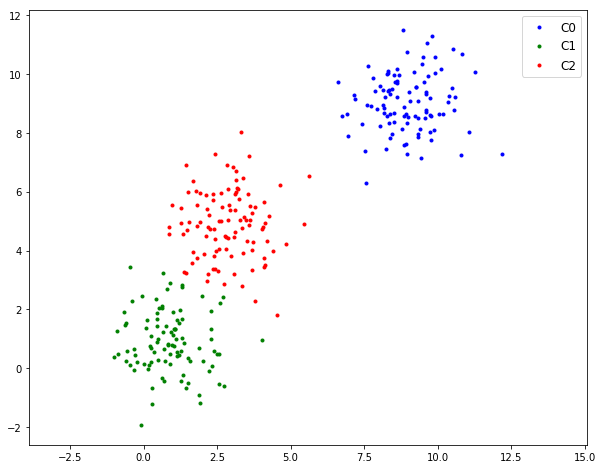

In [7]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize = (10, 8))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'C0')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.legend(fontsize = 12)
plt.axis('equal')
plt.show()

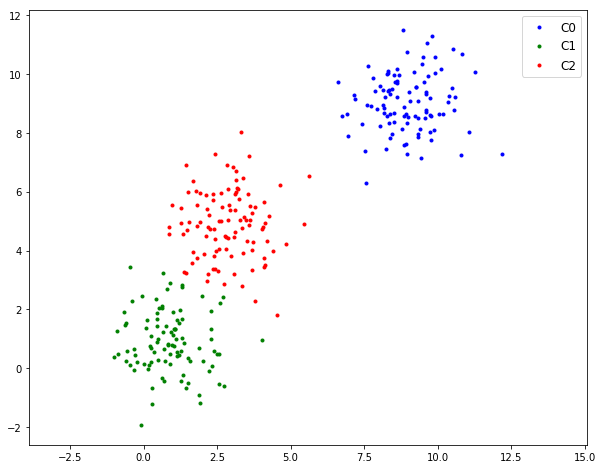

In [8]:
# use kmeans from the scikit-learn module

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

plt.figure(figsize = (10,8))
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1], 'b.', label = 'C0')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1], 'g.', label = 'C1')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

In [18]:
# Choosing the Number of Clusters (k = ??)
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
X

matrix([[ 8.51297989e-01,  7.42037518e-01],
        [ 5.76288030e-01,  8.69250379e-01],
        [ 5.90431722e-01,  1.36931120e+00],
        [ 1.59824413e+00,  8.93439695e-02],
        [ 1.42875631e+00, -6.86389024e-01],
        [ 7.68965131e-01,  2.65791943e-01],
        [ 1.45466934e+00,  1.44168797e+00],
        [ 1.19475639e+00,  7.93521263e-01],
        [ 2.39384384e+00,  6.50461439e-01],
        [ 8.29240817e-01,  2.41035839e+00],
        [-9.61273836e-01, -2.16165019e-01],
        [ 1.51545421e+00,  4.79981733e-01],
        [ 2.89497511e-01, -4.28951465e-01],
        [ 1.19926164e+00,  1.83321443e+00],
        [-7.81092132e-02,  1.69568991e+00],
        [ 2.46165871e+00,  3.32368397e+00],
        [ 1.71922796e-01,  1.73171578e+00],
        [-1.94395754e-01,  2.34919105e-01],
        [ 1.43536184e+00,  2.59212516e-01],
        [ 3.94221724e-01,  9.29156671e-01],
        [ 2.04530476e+00,  1.96764623e+00],
        [ 1.53733044e+00, -6.07892395e-03],
        [ 2.01307740e+00,  1.797

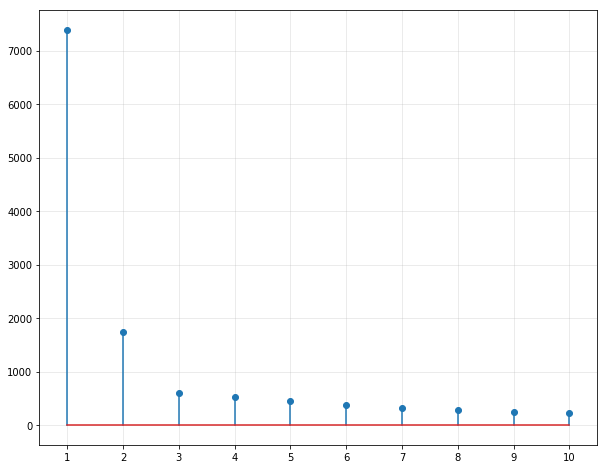

In [22]:
cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
    cost.append(abs(kmeans.score(X)))

plt.figure(figsize = (10,8))
plt.stem(range(1,11), cost)
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha = 0.3)
plt.show()
# 가장 값이 적게 떨어지기 시작하는 3을 선택 (사람이 선택)